**This notebook uses the embeddings generated in https://www.kaggle.com/code/mohammedobeidat/product-embeddings-from-images-keras-vgg16/notebook (version 3) to find top 20 similar items.**

Data can be found in this public dataset https://www.kaggle.com/datasets/mohammedobeidat/hm-product-image-embeddings

**Similar items are saved in a pickle file in https://www.kaggle.com/datasets/mohammedobeidat/hm-top-20-similar-items-using-image-embeddings**

**article_id's are saved in another pcikle in the same path sorted in the same order as the embeddings.**

In [1]:
import pickle
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
f = open('../input/hm-product-image-embeddings/embeds.pickle', 'rb')
paths = open('../input/hm-product-image-embeddings/paths.pickle', 'rb')
labels = open('../input/hm-product-image-embeddings/labels.pickle', 'rb')
paths = pickle.load(paths)

In [3]:
ids = np.array([path[-14:-4] for path in paths])

In [4]:
labels = np.array([pickle.load(labels) for i in range(105100)])

In [5]:
embeds = np.array([pickle.load(f)[0] for i, path in zip(range(105100), paths)])

In [6]:
df = pd.DataFrame(embeds)
df['article_id'] = ids
df['label'] = labels

In [7]:
df[['article_id', 'label']].to_csv('cnn_labels.csv', index=False)

In [8]:
x = df.drop(['article_id', 'label'], axis=1)
y = df.article_id

In [9]:
knn = KNN(20, metric='cosine')

In [10]:
knn.fit(x,y)

KNeighborsClassifier(metric='cosine', n_neighbors=20)

In [11]:
# scores = knn.kneighbors()

In [12]:
# similar = open('top_20.pickle', 'wb')
# pickle.dump(scores, similar)

In [13]:
def plot_items(items, scores, labels):
    path = "../input/h-and-m-personalized-fashion-recommendations/images"

    k = len(items)
    fig = plt.figure(figsize=(3*k, 10))
    for item, i, score, label in zip(items, range(1, k+1), scores, labels):
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, k, i)
        plt.axis(False)
        plt.title(str(score)+' - '+(label))
        plt.imshow(image)

0.96900016
CPU times: user 2.33 s, sys: 300 ms, total: 2.63 s
Wall time: 2.56 s


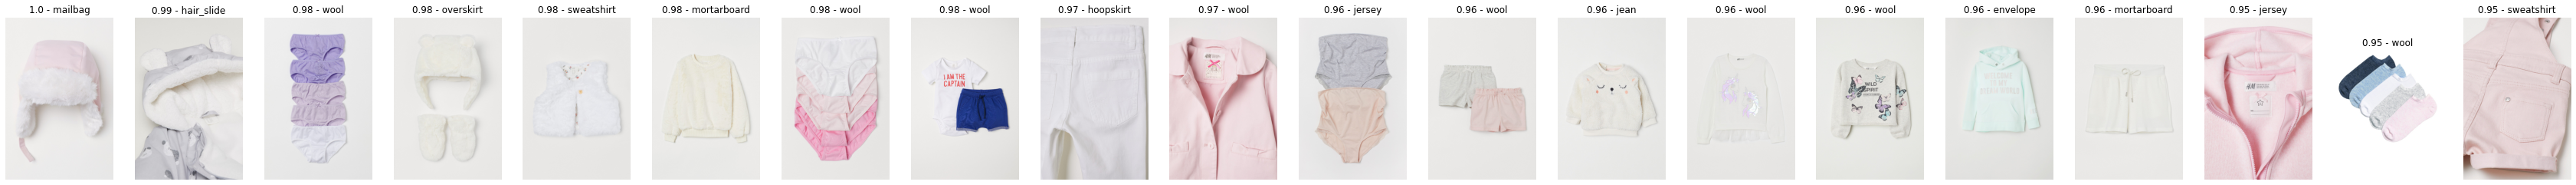

In [14]:
%%time
rand = x.sample(1)
sample = knn.kneighbors(rand, 20)
rcmnds = ids[sample[1][0]]
scores = np.round(1- sample[0][0], 2)
sample_labels = df[df.article_id.isin(rcmnds)].label
print(scores.mean())
plot_items(rcmnds, scores, labels)